<a href="https://colab.research.google.com/github/gabena98/ML_project/blob/main/monkNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import make_scorer, accuracy_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [3]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [4]:
# load the dataset
monks_1_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MONK/monk_1_train_hot.csv',
                            names=["y", "x1_1", "x1_2", "x1_3", "x2_1", "x2_2", "x2_3", "x3_1", "x3_2", "x4_1", "x4_2", "x4_3", "x5_1", "x5_2", "x5_3", "x5_4", "x6_1", "x6_2"])
monks_2_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MONK/monk_2_train_hot.csv',
                            names=["y", "x1_1", "x1_2", "x1_3", "x2_1", "x2_2", "x2_3", "x3_1", "x3_2", "x4_1", "x4_2", "x4_3", "x5_1", "x5_2", "x5_3", "x5_4", "x6_1", "x6_2"])
monks_3_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MONK/monk_3_train_hot.csv',
                            names=["y", "x1_1", "x1_2", "x1_3", "x2_1", "x2_2", "x2_3", "x3_1", "x3_2", "x4_1", "x4_2", "x4_3", "x5_1", "x5_2", "x5_3", "x5_4", "x6_1", "x6_2"])
monks_1_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MONK/monk_1_test_hot.csv',
                           names=["y", "x1_1", "x1_2", "x1_3", "x2_1", "x2_2", "x2_3", "x3_1", "x3_2", "x4_1", "x4_2", "x4_3", "x5_1", "x5_2", "x5_3", "x5_4", "x6_1", "x6_2"])
monks_2_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MONK/monk_2_test_hot.csv',
                           names=["y", "x1_1", "x1_2", "x1_3", "x2_1", "x2_2", "x2_3", "x3_1", "x3_2", "x4_1", "x4_2", "x4_3", "x5_1", "x5_2", "x5_3", "x5_4", "x6_1", "x6_2"])
monks_3_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MONK/monk_3_test_hot.csv', 
                           names=["y", "x1_1", "x1_2", "x1_3", "x2_1", "x2_2", "x2_3", "x3_1", "x3_2", "x4_1", "x4_2", "x4_3", "x5_1", "x5_2", "x5_3", "x5_4", "x6_1", "x6_2"])

In [5]:
monks_1_train

,y,x1_1,x1_2,x1_3,x2_1,x2_2,x2_3,x3_1,x3_2,x4_1,x4_2,x4_3,x5_1,x5_2,x5_3,x5_4,x6_1,x6_2
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
120,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
121,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
122,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


# **Nuovo input**

In [6]:
X_1_tr = monks_1_train.iloc[:,1:].values
y_1_tr = monks_1_train.iloc[:,0].values

X_2_tr = monks_2_train.iloc[:,1:].values
y_2_tr = monks_2_train.iloc[:,0].values

X_3_tr = monks_3_train.iloc[:,1:].values
y_3_tr = monks_3_train.iloc[:,0].values

X_test_1 = monks_1_test.iloc[:,1:].values
y_test_1 = monks_1_test.iloc[:,0].values

X_test_2 = monks_2_test.iloc[:,1:].values
y_test_2 = monks_2_test.iloc[:,0].values

X_test_3 = monks_3_test.iloc[:,1:].values
y_test_3 = monks_3_test.iloc[:,0].values

# **MONK 1**

In [33]:
...
# define the keras model for monk 1
model_1 = Sequential()
model_1.add(Dense(4, input_shape=(X_1_tr.shape[1],), activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))
...

Ellipsis

In [34]:
...
# compile the keras model
model_1.summary()
opt = tf.keras.optimizers.experimental.SGD(0.02, momentum=0.09)
model_1.compile(loss='mean_squared_error', optimizer = opt, metrics=['accuracy'])
...

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 4)                 72        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


Ellipsis

In [35]:
%%time
# fit the keras model on the dataset
history1 = model_1.fit(X_1_tr, y_1_tr,validation_data=(X_test_1,y_test_1) ,epochs=80, batch_size=1)
...

Epoch 1/80
124/124 [==============================] - 1s 8ms/step - loss: 0.2749 - accuracy: 0.5081 - val_loss: 0.2605 - val_accuracy: 0.5139
Epoch 2/80
124/124 [==============================] - 1s 7ms/step - loss: 0.2373 - accuracy: 0.5968 - val_loss: 0.2451 - val_accuracy: 0.5625
Epoch 3/80
124/124 [==============================] - 1s 7ms/step - loss: 0.2194 - accuracy: 0.6532 - val_loss: 0.2337 - val_accuracy: 0.5926
Epoch 4/80
124/124 [==============================] - 1s 7ms/step - loss: 0.2057 - accuracy: 0.6935 - val_loss: 0.2258 - val_accuracy: 0.6273
Epoch 5/80
124/124 [==============================] - 1s 5ms/step - loss: 0.1940 - accuracy: 0.7419 - val_loss: 0.2173 - val_accuracy: 0.6574
Epoch 6/80
124/124 [==============================] - 1s 7ms/step - loss: 0.1833 - accuracy: 0.7339 - val_loss: 0.2095 - val_accuracy: 0.6713
Epoch 7/80
124/124 [==============================] - 1s 5ms/step - loss: 0.1736 - accuracy: 0.7661 - val_loss: 0.2018 - val_accuracy: 0.6898
Epoch 

Ellipsis

Train MSE: 0.006974 Test MSE: 0.011369
Train accuracy: 1.0000 Test accuracy: 1.0000


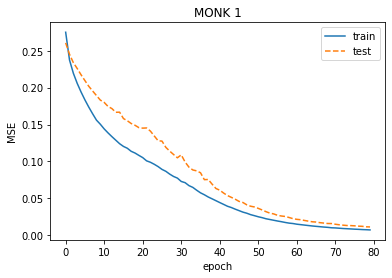

In [37]:
#Evaluate model
from matplotlib import pyplot
train_mse,train_accuracy = model_1.evaluate(X_1_tr, y_1_tr, verbose=0)
test_mse,test_accuracy = model_1.evaluate(X_test_1,y_test_1,verbose=0)
print('Train MSE: %.6f Test MSE: %.6f'%(train_mse,test_mse))
print('Train accuracy: %.4f Test accuracy: %.4f'%(train_accuracy,test_accuracy))
pyplot.title('MONK 1')
pyplot.plot(history1.history['loss'], label='train')
pyplot.plot(history1.history['val_loss'], label='test',linestyle="dashed")
pyplot.xlabel('epoch')
pyplot.ylabel('MSE')
pyplot.legend()
pyplot.show()

# **MONK 2**

In [43]:
...
# define the keras model for monk 2
model_2 = Sequential()
model_2.add(Dense(4, input_shape=(X_test_2.shape[1],), activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))
...

Ellipsis

In [44]:
...
# compile the keras model
model_2.summary()
opt = tf.keras.optimizers.experimental.SGD(learning_rate = 0.05, momentum=0.09)
model_2.compile(loss='mean_squared_error', optimizer = opt, metrics=['accuracy'])
...

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 72        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


Ellipsis

In [45]:
%%time
# fit the keras model on the dataset
history2 = model_2.fit(X_2_tr, y_2_tr,validation_data=(X_test_2,y_test_2) , epochs=30, batch_size=1)
...

Epoch 1/30
169/169 [==============================] - 1s 6ms/step - loss: 0.2467 - accuracy: 0.5976 - val_loss: 0.2292 - val_accuracy: 0.6412
Epoch 2/30
169/169 [==============================] - 1s 4ms/step - loss: 0.2352 - accuracy: 0.6213 - val_loss: 0.2315 - val_accuracy: 0.6273
Epoch 3/30
169/169 [==============================] - 1s 5ms/step - loss: 0.2317 - accuracy: 0.6154 - val_loss: 0.2240 - val_accuracy: 0.6343
Epoch 4/30
169/169 [==============================] - 1s 4ms/step - loss: 0.2264 - accuracy: 0.6391 - val_loss: 0.2209 - val_accuracy: 0.6366
Epoch 5/30
169/169 [==============================] - 1s 4ms/step - loss: 0.2197 - accuracy: 0.6095 - val_loss: 0.2207 - val_accuracy: 0.6273
Epoch 6/30
169/169 [==============================] - 1s 4ms/step - loss: 0.2108 - accuracy: 0.6391 - val_loss: 0.2082 - val_accuracy: 0.6597
Epoch 7/30
169/169 [==============================] - 1s 5ms/step - loss: 0.2021 - accuracy: 0.6450 - val_loss: 0.1990 - val_accuracy: 0.6597
Epoch 

Ellipsis

Train MSE: 0.009357 Test MSE: 0.011100
Train accuracy: 1.0000 Test accuracy: 1.0000


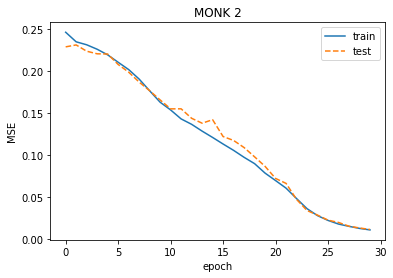

In [47]:
#Evaluate model
from matplotlib import pyplot
train_mse, train_accuracy = model_2.evaluate(X_2_tr, y_2_tr, verbose=0)
test_mse, test_accuracy = model_2.evaluate(X_test_2,y_test_2,verbose=0)
print('Train MSE: %.6f Test MSE: %.6f'%(train_mse,test_mse))
print('Train accuracy: %.4f Test accuracy: %.4f'%(train_accuracy,test_accuracy))
pyplot.title('MONK 2')
pyplot.plot(history2.history['loss'], label='train')
pyplot.plot(history2.history['val_loss'], label='test',linestyle="dashed" )
pyplot.xlabel('epoch')
pyplot.ylabel('MSE')
pyplot.legend()
pyplot.show()

# **MONK 3**

In [53]:
...
# define the keras model for monk 3
model_3 = Sequential()
model_3.add(Dense(5, input_shape=(X_test_3.shape[1],), activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))
...

Ellipsis

In [54]:
...
# compile the keras model
model_3.summary()
opt = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum=0.5)
model_3.compile(loss='mean_squared_error', optimizer = opt, metrics=['accuracy'])
...

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 5)                 90        
                                                                 
 dense_19 (Dense)            (None, 1)                 6         
                                                                 
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


Ellipsis

In [55]:
%%time
# fit the keras model on the dataset
history3 = model_3.fit(X_3_tr, y_3_tr,validation_data=(X_test_3,y_test_3) ,epochs=80, batch_size=1)
...

Epoch 1/80
122/122 [==============================] - 1s 6ms/step - loss: 0.2984 - accuracy: 0.5656 - val_loss: 0.2658 - val_accuracy: 0.5648
Epoch 2/80
122/122 [==============================] - 1s 7ms/step - loss: 0.2652 - accuracy: 0.5492 - val_loss: 0.2452 - val_accuracy: 0.5903
Epoch 3/80
122/122 [==============================] - 1s 5ms/step - loss: 0.2456 - accuracy: 0.5738 - val_loss: 0.2330 - val_accuracy: 0.6296
Epoch 4/80
122/122 [==============================] - 1s 7ms/step - loss: 0.2329 - accuracy: 0.6066 - val_loss: 0.2226 - val_accuracy: 0.6620
Epoch 5/80
122/122 [==============================] - 1s 5ms/step - loss: 0.2213 - accuracy: 0.6230 - val_loss: 0.2127 - val_accuracy: 0.6898
Epoch 6/80
122/122 [==============================] - 1s 7ms/step - loss: 0.2096 - accuracy: 0.7131 - val_loss: 0.2004 - val_accuracy: 0.7269
Epoch 7/80
122/122 [==============================] - 1s 5ms/step - loss: 0.1968 - accuracy: 0.7049 - val_loss: 0.1875 - val_accuracy: 0.7431
Epoch 

Ellipsis

Train MSE: 0.0419 Test MSE: 0.0425
Train accuracy: 0.9590 Test accuracy: 0.9560


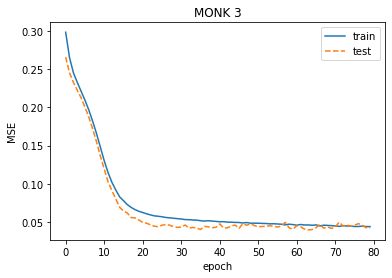

In [59]:
#Evaluate model
from matplotlib import pyplot
train_mse, train_accuracy = model_3.evaluate(X_3_tr, y_3_tr, verbose=0)
test_mse, test_accuracy = model_3.evaluate(X_test_3,y_test_3,verbose=0)
print('Train MSE: %.4f Test MSE: %.4f'%(train_mse,test_mse))
print('Train accuracy: %.4f Test accuracy: %.4f'%(train_accuracy,test_accuracy))
pyplot.title('MONK 3')
pyplot.plot(history3.history['loss'], label='train')
pyplot.plot(history3.history['val_loss'], label='test', linestyle="dashed")
pyplot.xlabel('epoch')
pyplot.ylabel('MSE')
pyplot.legend()
pyplot.show()

# **MONK 3 regolarizzato**

In [72]:
...
# define the keras model for monk 3
model_3 = Sequential()
model_3.add(Dense(5, input_shape=(X_test_3.shape[1],), activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))
...

Ellipsis

In [73]:
...
# compile the keras model
model_3.summary()
opt = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum=0.5, decay=1e-3)
model_3.compile(loss='mean_squared_error', optimizer = opt, metrics=['accuracy'])
...

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 5)                 90        
                                                                 
 dense_25 (Dense)            (None, 1)                 6         
                                                                 
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


Ellipsis

In [74]:
%%time
# fit the keras model on the dataset
history3_reg = model_3.fit(X_3_tr, y_3_tr,validation_data=(X_test_3,y_test_3) ,epochs=100, batch_size=1)
...

Epoch 1/100
122/122 [==============================] - 1s 6ms/step - loss: 0.3168 - accuracy: 0.4836 - val_loss: 0.3003 - val_accuracy: 0.4421
Epoch 2/100
122/122 [==============================] - 1s 5ms/step - loss: 0.2744 - accuracy: 0.5164 - val_loss: 0.2699 - val_accuracy: 0.4884
Epoch 3/100
122/122 [==============================] - 1s 7ms/step - loss: 0.2488 - accuracy: 0.5820 - val_loss: 0.2521 - val_accuracy: 0.5394
Epoch 4/100
122/122 [==============================] - 1s 7ms/step - loss: 0.2325 - accuracy: 0.6557 - val_loss: 0.2381 - val_accuracy: 0.5787
Epoch 5/100
122/122 [==============================] - 1s 7ms/step - loss: 0.2186 - accuracy: 0.6721 - val_loss: 0.2265 - val_accuracy: 0.6250
Epoch 6/100
122/122 [==============================] - 1s 7ms/step - loss: 0.2063 - accuracy: 0.7213 - val_loss: 0.2149 - val_accuracy: 0.6528
Epoch 7/100
122/122 [==============================] - 1s 7ms/step - loss: 0.1957 - accuracy: 0.7459 - val_loss: 0.2044 - val_accuracy: 0.6898

Ellipsis

Train MSE: 0.0600 Test MSE: 0.0488
Train accuracy: 0.9344 Test accuracy: 0.9722


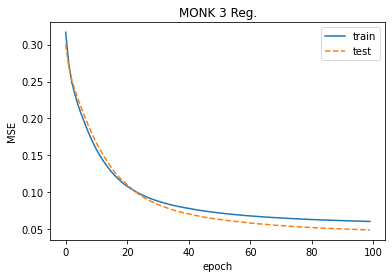

In [76]:
#Evaluate model
from matplotlib import pyplot
train_mse, train_accuracy = model_3.evaluate(X_3_tr, y_3_tr, verbose=0)
test_mse, test_accuracy = model_3.evaluate(X_test_3,y_test_3,verbose=0)
print('Train MSE: %.4f Test MSE: %.4f'%(train_mse,test_mse))
print('Train accuracy: %.4f Test accuracy: %.4f'%(train_accuracy,test_accuracy))
pyplot.title('MONK 3 Reg.')
pyplot.plot(history3_reg.history['loss'], label='train')
pyplot.plot(history3_reg.history['val_loss'], label='test', linestyle="dashed")
pyplot.xlabel('epoch')
pyplot.ylabel('MSE')
pyplot.legend()
pyplot.show()